## Goals of the Data Cleaning - Using EDA
1. Missing Values treatment 
2. Outliers treatment 
3. Zero values treatment 
4. Data Cleaning using Frequncy Distribution 
5. Feature selection using Multicolinearity 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
from collections import defaultdict
from collections import Counter 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### Import necessary Packages 

In [2]:
test = pd.read_csv('D:\HATHWAY ISP\DSC\Project\Housing\\test.csv')
train = pd.read_csv('D:\HATHWAY ISP\DSC\Project\Housing\\train.csv')

### Drop the Unwanted Feature
ID [Feature] has no meaning in the Given Dataset. So we will drop this Feature 

In [3]:
train.drop('Id', axis = 1, inplace = True)

## 1.Missing_Values_Treatment 

In [6]:
missing_features(train,50)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

* Above features are categorical  and conains more than 50% of missing data , we will drop those features having 50% missing values

In [7]:
for Unwanted_feature in missing_features(train,50):
    train.drop(Unwanted_feature, axis = 1, inplace = True)

In [8]:
train.shape

(1460, 76)

In [9]:
Numeric_Info(train[missing_Percent_Feature(train)])

,Missing_%,Missing_Count,Zero_%,Zeros_Count,Distinct_Count,Mean,Std_From_Mean,Median,Std_From_Median
Feature_Name,,,,,,,,,
LotFrontage,17.739726,259.0,0.000000,0.0,111.0,70.049958,24.284752,69.0,NaN
MasVnrArea,0.547945,8.0,58.972603,861.0,328.0,103.685262,181.066207,0.0,NaN
GarageYrBlt,5.547945,81.0,0.000000,0.0,98.0,1978.506164,24.689725,1980.0,NaN


* 3 Numerical Features contains missing data . we will fill the 2 Features msiing data with mean of the feature.
* But MasVnrArea has 58 % zero values , so we ignoire the zero values and calculate the mean to fill missing values 

In [10]:
features = ['LotFrontage','GarageYrBlt']
for feature in features :
    mean_f = train[feature].mean()
    train[feature] = train[feature].fillna(mean_f) 

In [11]:
Numeric_Info(train[missing_Percent_Feature(train)])

,Missing_%,Missing_Count,Zero_%,Zeros_Count,Distinct_Count,Mean,Std_From_Mean,Median,Std_From_Median
Feature_Name,,,,,,,,,
MasVnrArea,0.547945,8.0,58.972603,861.0,328.0,103.685262,181.066207,0.0,NaN


In [12]:
mean_f = train['MasVnrArea'].sum()/(len(train['MasVnrArea'])-861)
train['MasVnrArea'] = train['MasVnrArea'].fillna(mean_f) 

In [13]:
Categorical_Info(train[missing_Percent_Feature(train)])

,Mode,Missing_%,Missing_Count,Distinct_Count
Feature_Name,,,,
MasVnrType,None,0.547945,8.0,5.0
BsmtQual,TA,2.534247,37.0,5.0
BsmtCond,TA,2.534247,37.0,5.0
BsmtExposure,No,2.602740,38.0,5.0
BsmtFinType1,Unf,2.534247,37.0,7.0
BsmtFinType2,Unf,2.602740,38.0,7.0
Electrical,SBrkr,0.068493,1.0,6.0
FireplaceQu,NaN,47.260274,690.0,6.0
GarageType,Attchd,5.547945,81.0,7.0


* We will consider Mode to fill missing values in the above categorical features except FireplaceQu .
* FireplaceQu has most occuring value - NaN i.e missing And these missing % is very close to 50 % of data points 
* as filling these missing values negatively imapct target variable .So it will beter to drop it

In [14]:
train.drop('FireplaceQu', axis = 1, inplace = True)

In [15]:
for feature in missing_Percent_Feature(train) :
    CO = Counter(train[feature])
    data , count = (CO.most_common(1)[0])
    train[feature] = train[feature].fillna(data)

##  2.Frequncy_Distribution 

* Below list contains the Features that contain  a category having 80 % values 

In [16]:
cat_freq_list()

,0,Mode,Distinct_Count
Utilities,100.000000,AllPub,2.0
Street,99.657300,Pave,2.0
Condition2,99.040439,Norm,8.0
RoofMatl,98.286498,CompShg,8.0
Heating,97.875257,GasA,6.0
GarageCond,96.435915,TA,5.0
GarageQual,95.407814,TA,5.0
LandSlope,94.722413,Gtl,3.0
CentralAir,93.557231,Y,2.0
Functional,93.214531,Typ,7.0


## We will drop the Features that contains a categorry having 80% values as it doesnt make sense to keep these variables

In [17]:
for Unwanted_feature in list(cat_freq_list().index):
    train.drop(Unwanted_feature, axis = 1, inplace = True)

In [18]:
train.shape

(1460, 55)

#  3.Zero_Values_Treatment 

### We will drop the Features that contains data points having 80% Zeros

In [19]:
data_num=Numeric_Info(train)
data_num_mis=data_num[data_num['Zero_%'] > 80]
data_num_mis['Zero_%'].sort_values(ascending=False)

Feature_Name
PoolArea         99.520548
3SsnPorch        98.356164
LowQualFinSF     98.219178
MiscVal          96.438356
BsmtHalfBath     94.383562
ScreenPorch      92.054795
BsmtFinSF2       88.561644
EnclosedPorch    85.753425
Name: Zero_%, dtype: float64

In [20]:
for Unwanted_feature in list(data_num_mis['Zero_%'].index):
    train.drop(Unwanted_feature, axis = 1, inplace = True)

In [21]:
train.shape

(1460, 47)

##  4.Multicolinearity 

## We will drop the features those have  postive corelation above 0.7 among each other and retain only one that has more corelation with target variable

In [23]:
data1=Co_Variance_Info_ex(train,0.7)
data1[['A','B','Co_Variance']]

,A,B,Co_Variance
0,TotRmsAbvGrd,GrLivArea,0.825489
1,0.780555,GarageYrBlt,YearBuilt
2,GarageArea,GarageCars,0.882475
3,1stFlrSF,TotalBsmtSF,0.81953


In [24]:
list_f = ['GarageYrBlt','TotRmsAbvGrd','TotalBsmtSF','GarageCars']
for Unwanted_feature in list_f:
    train.drop(Unwanted_feature, axis = 1, inplace = True)

In [25]:
train.shape

(1460, 43)

## 5.Outliers Treatment 

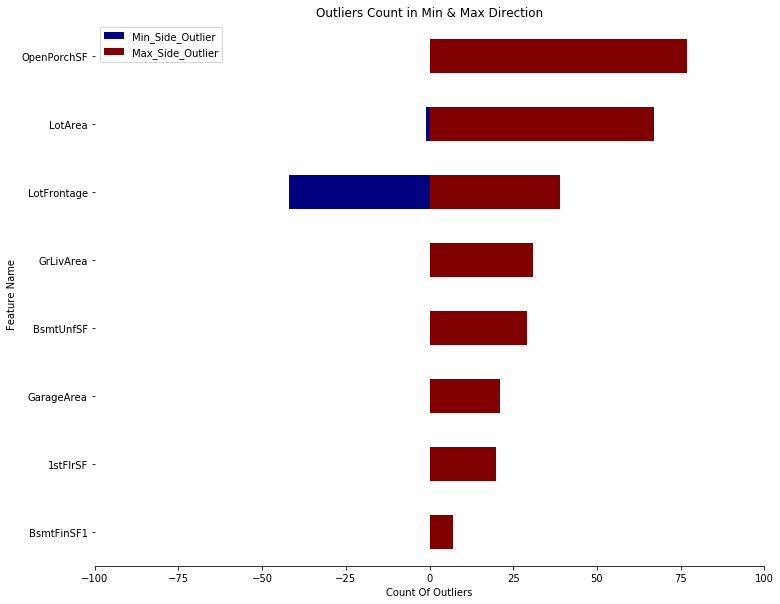

In [26]:
from matplotlib import cm
cmap = cm.get_cmap('jet')
                   
data1 = get_outlier_num(train) 
out_features = list(set(data1.index) - set(['MSSubClass','BedroomAbvGr','OverallQual','YearBuilt','SalePrice']))
data1 = data1.loc[out_features]
data1 = data1.sort_values(ascending=True,by='Max_Side_Outlier')
ax = data1.plot(kind='barh', figsize=(12,10), stacked=True, title='Outliers Count in Min & Max Direction', colormap=cmap, xlim=[-100,100])
ax.set_xlabel("Count Of Outliers")
ax.set_ylabel("Feature Name")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

In [27]:
Numeric_Info(train[data1.index])

,Missing_%,Missing_Count,Zero_%,Zeros_Count,Distinct_Count,Mean,Std_From_Mean,Median,Std_From_Median
Feature_Name,,,,,,,,,
BsmtFinSF1,0.0,0.0,31.986301,467.0,637.0,443.639726,456.098091,383.500000,460.048621
1stFlrSF,0.0,0.0,0.000000,0.0,753.0,1162.626712,386.587738,1087.000000,393.920549
GarageArea,0.0,0.0,5.547945,81.0,441.0,472.980137,213.804841,480.000000,213.920131
BsmtUnfSF,0.0,0.0,8.082192,118.0,780.0,567.240411,441.866955,477.500000,450.893854
GrLivArea,0.0,0.0,0.000000,0.0,861.0,1515.463699,525.480383,1464.000000,527.996175
LotFrontage,0.0,0.0,0.000000,0.0,111.0,70.049958,22.024023,70.049958,22.024023
LotArea,0.0,0.0,0.000000,0.0,1073.0,10516.828082,9981.264932,9478.500000,10035.163865
OpenPorchSF,0.0,0.0,44.931507,656.0,202.0,46.660274,66.256028,25.000000,69.709040


In [28]:
out_features = list(set(data1.index) - set(['MSSubClass','BedroomAbvGr','OverallQual','YearBuilt','SalePrice']))

In [29]:
for feature in list(out_features) :
    High , Low = get_outlier_num_high_low(train,feature)
    if High !=0:
        train = train[train[feature] < High]
    if Low !=0:
        train = train[train[feature] > Low]

In [30]:
train.shape

(1187, 43)

#### Target Variable Distribution After Data Cleaning
* Below Graph shows SalesPrice distribution - 

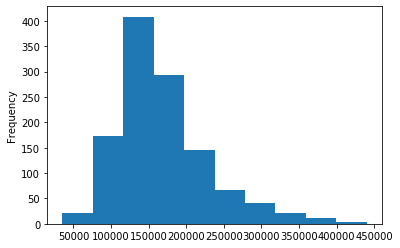

In [31]:
train['SalePrice'].plot(kind='hist')

## ***Data Cleaning notebook end ***
* List of Reusable EDA Funtions For Data Cleaning 

In [5]:
def distinct_feature_values(train_s):
    return len(train_s.unique())
def missing_feature_values(train_s):
    return train_s.isnull().sum()
def feature_mean_value(train_s):
    return train_s.mean()
def feature_max_value(train_s):
    return train_s.max()
def feature_min_value(train_s):
    return train_s.min()
def feature_zero_value(train_s):
    return train_s[train_s == 0].count()
def feature_mode_value(train_s):
    CO = Counter(train_s)
    data, count = (CO.most_common(1)[0])
    return data
def feature_freq_dist(feature,train_s):
    return train_s.groupby(by=feature)[feature].count()
def feature_median_value(train_s):
    return train_s.median()
def feature_std_mean_value(train_s):
    return train_s.std()
def feature_std_median_value(train_s):
    std = 0
    for value in train_s:
        std += (value - train_s.median()) ** 2 
        std_md = (np.sqrt(std) / np.sqrt(len(train_s) - 1 ) )
    return std_md
###############################################################################################################################

# this function will return the min and max value outlier of the feature on single dimension 

def feature_outlier_values(train_s,feature):
    outlier_Q3 = train_s[train_s[feature] > train_s[feature].median()]
    Q3 = outlier_Q3[feature].sort_values().median()
    outlier_Q1 = train_s[train_s[feature] < train_s[feature].median()]
    Q1 = outlier_Q1[feature].sort_values().median()
    IQR = Q3-Q1
    High = (Q3) + (1.5 * IQR)
    Low = (Q1) - (1.5 * IQR)
    if train_s[feature].min() > Low:
        Low = train_s[feature].min()
    if train_s[feature].max() < High:
        High = train_s[feature].max()
    return High , Low

# this function will return Dataframe of features containing outlier count in both direction  

def get_outlier_num(train):
    data1 = pd.DataFrame(np.random.rand(0, 3) * 0, columns=['Feature_Name', 'Min_Side_Outlier', 'Max_Side_Outlier'])
    #l = len(list(train.select_dtypes(exclude = ["object"]).columns))
    i=0
    for feature in list(train.select_dtypes(exclude = ["object"]).columns):
            High , Low = feature_outlier_values(train,feature)
            out_high = train[train[feature] > High][feature].sort_values().count()
            out_Low = train[train[feature] < Low][feature].sort_values().count()
            s = '<-Minimum--------Maximum->' 
            if ( out_high!=0) | (out_Low!=0):
                data1.loc[i, 'Feature_Name']     = feature
                data1.loc[i, 'Min_Side_Outlier'] = out_Low
                data1.loc[i, 'Max_Side_Outlier'] = out_high
                i+=1
    data1 = data1.set_index('Feature_Name') 
    data1['Min_Side_Outlier'] = data1['Min_Side_Outlier'] * -1
    return data1.sort_values(by='Max_Side_Outlier', ascending=True)

# Get Numeric Feature Info about Dataset 

def Numeric_Info(train):
    i=0
    data1 = pd.DataFrame(np.random.rand(0, 10) * 0, columns=['Feature_Name', 'Missing_%', 'Missing_Count', 'Zero_%', 'Zeros_Count', 'Distinct_Count', 'Mean', 'Std_From_Mean', 'Median', 'Std_From_Median'])#,'Maximum', 'Minimum', 'Outliers_Count_Max', 'Outliers_Count_Min'])
    for feature in list(train.select_dtypes(exclude = ["object"]).columns):
        #feature_info[feature] = [distinct_feature_values(train[feature])]
        data1.loc[i, 'Feature_Name']           = feature
       # data1.loc[i, 'Maximum']                = feature_max_value(train[feature])        
      #  data1.loc[i, 'Minimum']                = feature_min_value(train[feature])
        data1.loc[i, 'Mean']                   = feature_mean_value(train[feature])
        data1.loc[i, 'Median']                 = feature_median_value(train[feature])
        data1.loc[i, 'Std_From_Mean']          = feature_std_mean_value(train[feature])
        data1.loc[i, 'Std_From_Median']        = feature_std_median_value(train[feature])
        data1.loc[i, 'Missing_%']              = missing_feature_values(train[feature])/len(train[feature])*100
        data1.loc[i, 'Missing_Count']          = missing_feature_values(train[feature])        
        data1.loc[i, 'Zero_%']                 = feature_zero_value(train[feature])/len(train[feature])*100
        data1.loc[i, 'Zeros_Count']            = feature_zero_value(train[feature])        
        data1.loc[i, 'Distinct_Count']         = distinct_feature_values(train[feature]) 
        #data1.loc[i, 'Outliers_Count_Max']     = distinct_feature_values(train[feature]) 
        #data1.loc[i, 'Outliers_Count_Min']     = distinct_feature_values(train[feature]) 
        i+=1
    data1 = data1.set_index('Feature_Name') 
    return data1

def Categorical_Info(train):
    i=0
    data1 = pd.DataFrame(np.random.rand(0, 5) * 0, columns=['Feature_Name', 'Mode', 'Missing_%', 'Missing_Count', 'Distinct_Count'])
    for feature in list(train.select_dtypes(include = ["object"]).columns):
        #feature_info[feature] = [distinct_feature_values(train[feature])]
        data1.loc[i, 'Feature_Name']     = feature
        #data1.loc[i, 'ferq_Dist']        = feature_freq_dist(feature, train)
        data1.loc[i, 'Mode']             = feature_mode_value(train[feature])
        data1.loc[i, 'Missing_%']        = missing_feature_values(train[feature])/len(train[feature])*100
        data1.loc[i, 'Missing_Count']    = missing_feature_values(train[feature])        
        data1.loc[i, 'Distinct_Count']   = distinct_feature_values(train[feature]) 
        i+=1
    data1 = data1.set_index('Feature_Name') 
    return data1

# Summirize the Frequency distribution of each categorical feature 

def freq_dist(train):
    i=0
    data1 = pd.DataFrame(np.random.rand(0, 3) * 0, columns=['Feature_Name', 'Cat_Name', 'Cat_Count'])
    for feature in list(train.select_dtypes(include = ["object"]).columns):
        f = list(train.groupby(by=feature)[feature].count().index)
        c = list(train.groupby(by=feature)[feature].count())
        fc = zip(f, c)
        for idx, item in enumerate(fc):
            cat , co = item
            data1.loc[i, 'Feature_Name']     = feature
            data1.loc[i, 'Cat_Name']         = cat
            data1.loc[i, 'Cat_Count']        = co
            i+=1
    return data1

# Write a function Calculate the Co variance 
def Co_Variance_Info_ex(data,corr_v):
    corr_value1 = corr_v
    corr_value2 = corr_v * -1
    num_features = list(data.select_dtypes(exclude = ["object"]).columns) 
    data = data[num_features]
    data = data.corr()
    i=0
    data1 = pd.DataFrame(np.random.rand(0, 3) * 0, columns=['Feature_Name1', 'Feature_Name2', 'Co_Variance'])
    for row in list(data.columns):
        for col in list(data.columns):
            if data.loc[(row),(col)] > corr_value1 :
                data1.loc[i, 'Feature_Name1']     = row
                data1.loc[i, 'Feature_Name2']     = col
                data1.loc[i, 'Co_Variance']       = data.loc[(row),(col)]
                i+=1
            if data.loc[(row),(col)] < corr_value2 :
                data1.loc[i, 'Feature_Name1']     = row
                data1.loc[i, 'Feature_Name2']     = col
                data1.loc[i, 'Co_Variance']       = data.loc[(row),(col)]
                i+=1
    data1 = data1[data1['Co_Variance'] != 1]
    set_target_v = 'SalePrice'
    data1 = data1[(data1['Feature_Name2'] != set_target_v) & (data1['Feature_Name1'] != set_target_v)]
    data1 = data1.apply(frozenset, axis=1)
    data1 = (set(data1))
    data1 = pd.DataFrame([list(x) for x in data1], columns=['Co_Variance','A','B'])
    #t = data1['Co_Variance'][0] #= data1['Co_Variance'][0]
    #data1['Co_Variance'][0] = data1['B'][0]
    #data1['B'][0] = t
    return data1

def Co_Variance_Info(data,corr_v):
    corr_value1 = corr_v
    corr_value2 = corr_v * -1
    num_features = list(data.select_dtypes(exclude = ["object"]).columns) 
    data = data[num_features]
    data = data.corr()
    i=0
    data1 = pd.DataFrame(np.random.rand(0, 3) * 0, columns=['Feature_Name1', 'Feature_Name2', 'Co_Variance'])
    for row in list(data.columns):
        for col in list(data.columns):
            if data.loc[(row),(col)] > corr_value1 :
                data1.loc[i, 'Feature_Name1']     = row
                data1.loc[i, 'Feature_Name2']     = col
                data1.loc[i, 'Co_Variance']       = data.loc[(row),(col)]
                i+=1
            if data.loc[(row),(col)] < corr_value2 :
                data1.loc[i, 'Feature_Name1']     = row
                data1.loc[i, 'Feature_Name2']     = col
                data1.loc[i, 'Co_Variance']       = data.loc[(row),(col)]
                i+=1
    data1 = data1[data1['Co_Variance'] != 1]
    set_target_v = 'SalePrice'
    data1 = data1[(data1['Feature_Name2'] != set_target_v) & (data1['Feature_Name1'] != set_target_v)]
    #data1 = data1.apply(frozenset, axis=1)
    #data1 = (set(series_set))
    return data1

def freq_dist1(train):
    i=0
    
    data_cat = Categorical_Info(train)
    ma_x = int(data_cat['Distinct_Count'].max())
    col = ['Feature_Name']
    for m in range(ma_x):
        col.append(m) 
    data1 = pd.DataFrame(np.random.rand(0, ma_x+1) * 0, columns=col)
    for feature in list(train.select_dtypes(include = ["object"]).columns):
        f = list(train.groupby(by=feature)[feature].count().index)
        c = list(train.groupby(by=feature)[feature].count())
        fc = zip(f, c)
        j=0
        data1.loc[i, 'Feature_Name']     = feature
        for idx, item in enumerate(fc):
            cat , co = item
            #data1.loc[i, 'Feature_Name']     = feature
            #data1.loc[i, 'Cat_Name']         = cat
            data1.loc[i, j]        = co*100/1459
            j+=1
        i+=1
        
    return data1

def get_outlier_num_high_low(train,feature):
    High , Low = feature_outlier_values(train,feature)
    #out_high = train[train[feature] > High][feature].min()#.sort_values().count()
    #out_Low = train[train[feature] < Low][feature].min()#.sort_values().count()
    if train[train[feature] > High][feature].sort_values().count() > 0:
        out_high = train[train[feature] > High][feature].min()
    if train[train[feature] < Low][feature].sort_values().count() > 0:
        out_Low = train[train[feature] < Low][feature].min()
    else:
        out_Low = 0
    return out_high,out_Low

def cat_freq_list():
    data_cat = Categorical_Info(train)
    data1 = freq_dist1(train)
    data1 = data1.set_index('Feature_Name')
    idx = data1.index
    data1 = pd.DataFrame(np.sort(-data1.values, axis=1), columns=data1.columns)
    data1 = data1.apply(lambda x : x * -1)
    data1 = data1.set_index(idx)
    data1 = data1[data1[0] > 80].sort_values(ascending=True,by=0)
    s = data1[0].sort_values(ascending=False)
    s2 = data_cat.loc[list(data1.index)]
    data_c = pd.concat([s,s2],axis=1).sort_values(ascending=False, by=0)[[0,'Mode','Distinct_Count']]
    data_c.rename(columns={0:"Category_%", "Mode":"Category_Name","Distinct_Count":"No_of_Categories"})
    return data_c
###############################################################################################################################
# Write down the function that will return Feature that contain 50% or more missing values 
def missing_features(data, Percent):
    mis_per = data.isnull().sum()/len(data)*100
    mis_per[mis_per > Percent]
    return list(mis_per[mis_per > Percent].index)

def missing_Percent(Data):
    Data = Data.isnull().sum()/len(Data)*100
    return Data[Data > 0].sort_values(ascending=False)

def missing_Percent_Feature(Data):
    Data = Data.isnull().sum()/len(Data)*100
    return list(Data[Data > 0].index)
